# Data Analysis on Cricket World-Cup 

- **Which team has won the most ODI World Cups, and how many times?**

- **Who are the top run-scorers and wicket-takers in ODI World Cup history?**

- **Who are the top-scorers and wicket-takers in ODI World Cup in Individual seasons?**
  
- **What is the highest individual score in an ODI World Cup match, and who achieved it?**

- **Which match had the closest finish in terms of runs or wickets, and what were the details?**

- **How have the average scores in ODI World Cup matches changed over the years?**

- **Which bowler has the best bowling figures in a single ODI World Cup match?**

- **How do different teams' performance metrics compare (e.g., win/loss ratio, average run rate)?**

- **What are the trends in the number of centuries and half-centuries scored over the years?**

- **Who scored highest number of centuries and whats the average balls in ODI history?**

- **How has the role of all-rounders evolved in the ODI World Cup over the years?**

**This are some The question we are going to solve by using python**

## Import Modules

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Modules used for Cleaning and Analysis 
import pandas as pd
import numpy as np
from scipy import stats
# Modules used to visulize The data/Insigts
import matplotlib.pyplot as plt
import seaborn as sns

## Load the required Data files

In [7]:
odi = pd.read_csv(r"../Data/all_match_info.csv")
odi_bat = pd.read_csv(r"../Data Cleaning/Data/pre_batting_data.csv")
odi_bow = pd.read_csv(r"../Data Cleaning/Data/pre_bowling_data.csv")

### Understand about the data

In [9]:
print("Basic information about the data ")
odi.info()

Basic information about the data 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Team 1 VS Team 2  493 non-null    object
 1   Team 1            493 non-null    object
 2   Team 2            493 non-null    object
 3   Winner            493 non-null    object
 4   Margin            493 non-null    object
 5   Ground            493 non-null    object
 6   Match Date        493 non-null    object
 7   Scorecard         493 non-null    object
 8   Match Link        493 non-null    object
 9   Ground Link       493 non-null    object
dtypes: object(10)
memory usage: 38.6+ KB


### Here we can observe that, "There are:
  - 493 entries, 0 to 492 [Rows]
  - 10 Columns. Every columns in the dataset is Object.
  - There are no null values in the dataset.
  - **Match Link** & **Ground Link** This columns is not necessary for the current analysis.
  - **Match Date** its date,But the data type is **Object**

In [11]:
odi.describe()

,Team 1 VS Team 2,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Match Link,Ground Link
count,493,493,493,493,493,493,493,493,493,493
unique,166,20,20,18,154,101,349,493,493,108
top,England VS Sri Lanka,Australia,Sri Lanka,Australia,7 wickets,Manchester,"Jun 18, 1983",ODI # 33,https://www.espncricinfo.com/series/prudential...,https://www.espncricinfo.com/cricket-grounds/o...
freq,11,87,71,78,51,17,4,1,1,17


- **count** : "There are 493 values in each columns"
- **unique** :
  + There are 166 unique combination matches were played in complete worldcup series.
  + There are 20 unique Teams played in ODI's.
  + Till now 18 unique teams/outcomes in ODI matches  .
  + Till now ODI matches were played in 101 unique Grounds.
  + Untill now there are 493 Matches are conducted in ODI's

In [13]:
odi.columns

Index(['Team 1 VS Team 2', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date', 'Scorecard', 'Match Link', 'Ground Link'],
      dtype='object')

### The columns in the above data set is:
**['Team 1 VS Team 2', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date', 'Scorecard', 'Match Link', 'Ground Link']**

In [15]:
odi.head(3)

,Team 1 VS Team 2,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Match Link,Ground Link
0,Australia VS West Indies,Australia,West Indies,West Indies,17 runs,Lord's,"Jun 21, 1975",ODI # 33,https://www.espncricinfo.com/series/prudential...,https://www.espncricinfo.com/cricket-grounds/l...
1,England VS Australia,England,Australia,Australia,4 wickets,Leeds,"Jun 18, 1975",ODI # 31,https://www.espncricinfo.com/series/prudential...,https://www.espncricinfo.com/cricket-grounds/h...
2,New Zealand VS West Indies,New Zealand,West Indies,West Indies,5 wickets,The Oval,"Jun 18, 1975",ODI # 32,https://www.espncricinfo.com/series/prudential...,https://www.espncricinfo.com/cricket-grounds/k...


In [16]:
odi.tail(5)

,Team 1 VS Team 2,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Match Link,Ground Link
488,India VS Australia,India,Australia,India,6 wickets,Chennai,"Oct 8, 2023",ODI # 4662,https://www.espncricinfo.com/series/icc-cricke...,https://www.espncricinfo.com/cricket-grounds/m...
489,South Africa VS Sri Lanka,South Africa,Sri Lanka,South Africa,102 runs,Delhi,"Oct 7, 2023",ODI # 4661,https://www.espncricinfo.com/series/icc-cricke...,https://www.espncricinfo.com/cricket-grounds/a...
490,Afghanistan VS Bangladesh,Afghanistan,Bangladesh,Bangladesh,6 wickets,Dharamsala,"Oct 7, 2023",ODI # 4660,https://www.espncricinfo.com/series/icc-cricke...,https://www.espncricinfo.com/cricket-grounds/h...
491,Netherlands VS Pakistan,Netherlands,Pakistan,Pakistan,81 runs,Hyderabad,"Oct 6, 2023",ODI # 4659,https://www.espncricinfo.com/series/icc-cricke...,https://www.espncricinfo.com/cricket-grounds/r...
492,England VS New Zealand,England,New Zealand,New Zealand,9 wickets,Ahmedabad,"Oct 5, 2023",ODI # 4658,https://www.espncricinfo.com/series/icc-cricke...,https://www.espncricinfo.com/cricket-grounds/n...


In [17]:
odi["Team 1"].sort_values().unique()

array(['Afghanistan', 'Australia', 'Bangladesh', 'Bermuda', 'Canada',
       'East Africa', 'England', 'India', 'Ireland', 'Kenya', 'Namibia',
       'Netherlands', 'New Zealand', 'Pakistan', 'Scotland',
       'South Africa', 'Sri Lanka', 'U.A.E.', 'West Indies', 'Zimbabwe'],
      dtype=object)

In [18]:
odi["Team 2"].sort_values().unique()

array(['Afghanistan', 'Australia', 'Bangladesh', 'Bermuda', 'Canada',
       'East Africa', 'England', 'India', 'Ireland', 'Kenya', 'Namibia',
       'Netherlands', 'New Zealand', 'Pakistan', 'Scotland',
       'South Africa', 'Sri Lanka', 'U.A.E.', 'West Indies', 'Zimbabwe'],
      dtype=object)

In [19]:
odi["Winner"].sort_values().unique()

array(['Afghanistan', 'Australia', 'Bangladesh', 'Canada', 'England',
       'India', 'Ireland', 'Kenya', 'Netherlands', 'New Zealand',
       'Pakistan', 'South Africa', 'Sri Lanka', 'U.A.E.', 'West Indies',
       'Zimbabwe', 'no result', 'tied'], dtype=object)

In [20]:
odi["Ground"].sort_values().unique()

array(['Adelaide', 'Ahmedabad', 'Albury', 'Amstelveen', 'Auckland',
       'Ballarat', 'Basseterre', 'Bengaluru', 'Benoni', 'Berri',
       'Birmingham', 'Bloemfontein', 'Bridgetown', 'Brisbane', 'Bristol',
       'Bulawayo', 'Canberra', 'Canterbury', 'Cape Town', 'Cardiff',
       'Centurion', 'Chandigarh', 'Chattogram', 'Chelmsford', 'Chennai',
       'Chester-le-Street', 'Christchurch', 'Colombo (RPS)',
       'Colombo (SSC)', 'Cuttack', 'Delhi', 'Derby', 'Dharamsala',
       'Dublin', 'Dunedin', 'Durban', 'East London', 'Eden Gardens',
       'Edinburgh', 'Faisalabad', 'Gqeberha', 'Gros Islet', 'Gujranwala',
       'Gwalior', 'Hambantota', 'Hamilton', 'Harare', 'Hobart', 'Hove',
       'Hyderabad', 'Hyderabad (Deccan)', 'Hyderabad (Sind)', 'Indore',
       'Jaipur', 'Johannesburg', 'Kandy', 'Kanpur', 'Karachi',
       'Kimberley', 'Kingston', 'Lahore', 'Leeds', 'Leicester', "Lord's",
       'Lucknow', 'Mackay', 'Manchester', 'Melbourne', 'Mirpur', 'Mohali',
       'Nagpur', 'Nairob

## What are the changes required in side the table/dataset.
- **Team 1 VS Team 2** : Since we have *Team 1* and *Team 2* there is no need for this column.
- **Margin** : In margin we can see that there are different outcomes like values followed by  **Runs** or **Wickets**. It can be splited for better understanding and Analysis purpose.
- **Match Date** : Match date data type should be converted in datetime.
- **Scorecard** : There are values like *ODI # 4662* . Where as 'ODI # ' is similar in each and every column. so we can split and drop the "ODI # ".
- **Match Link** and **Ground Link** :We can drop the columns. The is no need for the match link in curent analisys.

In [22]:
#Spliting the Scorecard.
odi["Id"] = odi.Scorecard.apply(lambda x: int(x.split(" # ")[-1]))

**In "Match Date" there are several format which cant be directly converted into datetime data type**

In [24]:
#Spliting the Match Date.
odi["Year"] = odi["Match Date"].apply(lambda x: pd.to_datetime(x.split(", ")[-1],format="%Y").year)
odi["Month"] = odi["Match Date"].apply(lambda x: pd.to_datetime(x.split(" ")[0],format="%b").month)

In [25]:
def day(x):
    #day
    dd = x.split(" ")[1].strip(",")
    try:
        dd = pd.to_datetime(int(dd),format="%d").day
        return dd
    except ValueError:
        dd = dd.split("-")[1]
        dd = pd.to_datetime(int(dd),format="%d").day
        return dd

odi["Date"] = odi["Match Date"].apply(day)

In [26]:
odi.head(3)

,Team 1 VS Team 2,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Match Link,Ground Link,Id,Year,Month,Date
0,Australia VS West Indies,Australia,West Indies,West Indies,17 runs,Lord's,"Jun 21, 1975",ODI # 33,https://www.espncricinfo.com/series/prudential...,https://www.espncricinfo.com/cricket-grounds/l...,33,1975,6,21
1,England VS Australia,England,Australia,Australia,4 wickets,Leeds,"Jun 18, 1975",ODI # 31,https://www.espncricinfo.com/series/prudential...,https://www.espncricinfo.com/cricket-grounds/h...,31,1975,6,18
2,New Zealand VS West Indies,New Zealand,West Indies,West Indies,5 wickets,The Oval,"Jun 18, 1975",ODI # 32,https://www.espncricinfo.com/series/prudential...,https://www.espncricinfo.com/cricket-grounds/k...,32,1975,6,18


In [27]:
odi.Winner.sort_values().unique()

array(['Afghanistan', 'Australia', 'Bangladesh', 'Canada', 'England',
       'India', 'Ireland', 'Kenya', 'Netherlands', 'New Zealand',
       'Pakistan', 'South Africa', 'Sri Lanka', 'U.A.E.', 'West Indies',
       'Zimbabwe', 'no result', 'tied'], dtype=object)

In [28]:
# Changing "no result" and "tied" to same value "tied"
no_res = {"no result":"tied"}
odi.Winner[odi.Winner == "no result"] = odi.Winner[odi.Winner == "no result"].map(no_res)

In [29]:
odi["R/W"] = odi.Margin.apply(lambda x:int(x.split(" ")[0]) if x!="-" else 0)
odi["Runs/Wickets"] = odi.Margin.apply(lambda x:str(x.split(" ")[1]) if x!="-" else "tied")

In [30]:
odi.head()

,Team 1 VS Team 2,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Match Link,Ground Link,Id,Year,Month,Date,R/W,Runs/Wickets
0,Australia VS West Indies,Australia,West Indies,West Indies,17 runs,Lord's,"Jun 21, 1975",ODI # 33,https://www.espncricinfo.com/series/prudential...,https://www.espncricinfo.com/cricket-grounds/l...,33,1975,6,21,17,runs
1,England VS Australia,England,Australia,Australia,4 wickets,Leeds,"Jun 18, 1975",ODI # 31,https://www.espncricinfo.com/series/prudential...,https://www.espncricinfo.com/cricket-grounds/h...,31,1975,6,18,4,wickets
2,New Zealand VS West Indies,New Zealand,West Indies,West Indies,5 wickets,The Oval,"Jun 18, 1975",ODI # 32,https://www.espncricinfo.com/series/prudential...,https://www.espncricinfo.com/cricket-grounds/k...,32,1975,6,18,5,wickets
3,England VS East Africa,England,East Africa,England,196 runs,Birmingham,"Jun 14, 1975",ODI # 27,https://www.espncricinfo.com/series/prudential...,https://www.espncricinfo.com/cricket-grounds/e...,27,1975,6,14,196,runs
4,India VS New Zealand,India,New Zealand,New Zealand,4 wickets,Manchester,"Jun 14, 1975",ODI # 28,https://www.espncricinfo.com/series/prudential...,https://www.espncricinfo.com/cricket-grounds/o...,28,1975,6,14,4,wickets


In [31]:
# Droping the un-relavent columns.
odi.drop(columns=["Team 1 VS Team 2","Match Link","Ground Link","Margin","Match Date","Scorecard"],inplace=True)
odi.head(1)

,Team 1,Team 2,Winner,Ground,Id,Year,Month,Date,R/W,Runs/Wickets
0,Australia,West Indies,West Indies,Lord's,33,1975,6,21,17,runs


In [32]:
# Arranging the Columns in an order.
odi = odi[["Id","Team 1","Team 2","Winner","R/W","Runs/Wickets","Date","Month","Year","Ground"]]
odi.head(1)

,Id,Team 1,Team 2,Winner,R/W,Runs/Wickets,Date,Month,Year,Ground
0,33,Australia,West Indies,West Indies,17,runs,21,6,1975,Lord's


In [33]:
# Verify the Information 
odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            493 non-null    int64 
 1   Team 1        493 non-null    object
 2   Team 2        493 non-null    object
 3   Winner        493 non-null    object
 4   R/W           493 non-null    int64 
 5   Runs/Wickets  493 non-null    object
 6   Date          493 non-null    int64 
 7   Month         493 non-null    int64 
 8   Year          493 non-null    int64 
 9   Ground        493 non-null    object
dtypes: int64(5), object(5)
memory usage: 38.6+ KB


### Insigts

In [35]:
sns.set_theme(style='darkgrid')

**Which team has won the most ODI World Cups, and how many times?**

<Axes: xlabel='Winner', ylabel='count'>

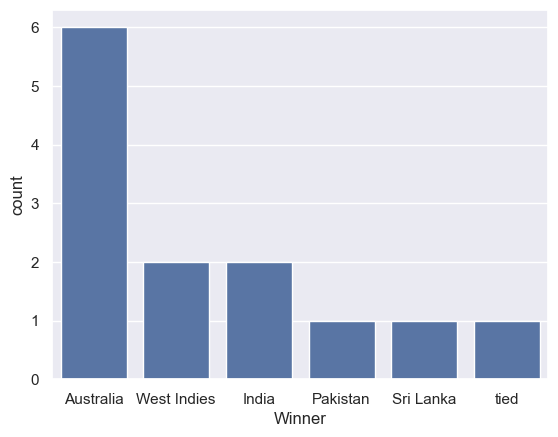

In [37]:
odi1 = odi.sort_values(by=["Year","Month","Date"],ascending=False)
odi1 = odi1.groupby("Year").first()[["Winner"]].reset_index()
sns.countplot(x="Winner",data=odi1,order=odi1["Winner"].value_counts().index)

In [38]:
percnt = 6/odi1["Winner"].value_counts().sum()*100
print("Winning percentage of Austarlia is",round(percnt))

Winning percentage of Austarlia is 46


**Which team has won the most ODI World Cups, and how many times?**
- Australia won most of the world cup.
- Australia won 6 times.
- Winning percentage of Austarlia is 46.

**Which Team won the most of the matches in ODI's**

Which team has won the most ODI World Cups, and how many times?


Text(0.5, 1.0, 'The most ODI World Cups achived by!')

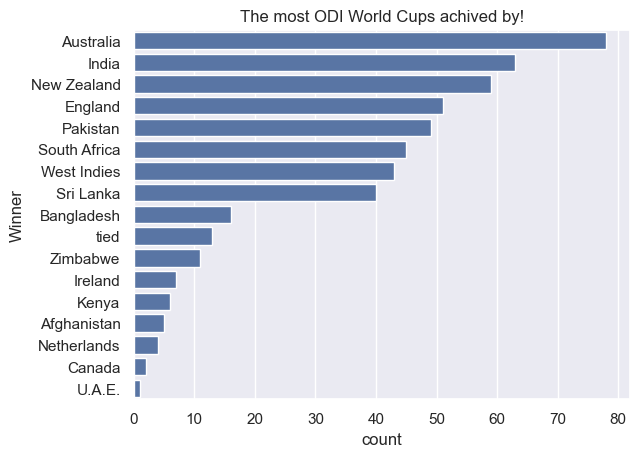

In [41]:
print("Which team has won the most ODI World Cups, and how many times?")
sns.countplot(y="Winner",data=odi,order=odi["Winner"].value_counts().index)
plt.title("The most ODI World Cups achived by!")

### Who are the top run-scorers and wicket-takers in ODI World Cup history?

In [43]:
odi_bat.head()

,VS,Player,,Batting Possition,Match Id,Teaminnings,Runs,Balls,Mins,Fours,Sixs,Strike Rate
0,Australia VS West Indies,Roy Fredericks,hit wicket b Lillee,1.0,ODI # 33,West Indies,7.0,13.0,14.0,0.0,0.0,53.84
1,Australia VS West Indies,Gordon Greenidge,c †Marsh b Thomson,2.0,ODI # 33,West Indies,13.0,61.0,80.0,1.0,0.0,21.31
2,Australia VS West Indies,Alvin Kallicharran,c †Marsh b Gilmour,3.0,ODI # 33,West Indies,12.0,18.0,26.0,2.0,0.0,66.66
3,Australia VS West Indies,Rohan Kanhai,b Gilmour,4.0,ODI # 33,West Indies,55.0,105.0,156.0,8.0,0.0,52.38
4,Australia VS West Indies,Clive Lloyd,c †Marsh b Gilmour,5.0,ODI # 33,West Indies,102.0,85.0,108.0,12.0,2.0,120.00


In [44]:
#Spliting the Match Id.
odi_bat["Id"] = odi_bat["Match Id"].apply(lambda x: int(x.split(" # ")[-1]))


In [45]:
odi_bat[odi_bat["Id"]==722]

,VS,Player,,Batting Possition,Match Id,Teaminnings,Runs,Balls,Mins,Fours,Sixs,Strike Rate,Id
1996,India VS Sri Lanka,Kris Srikkanth,not out,1.0,ODI # 722,India,1.0,2.0,2.0,0.0,0.0,50.0,722
1997,India VS Sri Lanka,Kapil Dev,not out,2.0,ODI # 722,India,0.0,0.0,2.0,0.0,0.0,0.0,722


In [46]:
odi_bat = odi_bat.drop(columns=["Match Id","VS"]).merge(odi[["Year","Id"]],on="Id")

In [47]:
odi_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8681 entries, 0 to 8680
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             8681 non-null   object 
 1                      8681 non-null   object 
 2   Batting Possition  8681 non-null   float64
 3   Teaminnings        8681 non-null   object 
 4   Runs               8681 non-null   float64
 5   Balls              8681 non-null   float64
 6   Mins               8681 non-null   float64
 7   Fours              8681 non-null   float64
 8   Sixs               8681 non-null   float64
 9   Strike Rate        8681 non-null   float64
 10  Id                 8681 non-null   int64  
 11  Year               8681 non-null   int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 814.0+ KB


In [48]:
odi_bow["Id"] = odi_bow["Match Id"].apply(lambda x:int(x.split(" # ")[1]))

In [49]:
odi_bow = odi_bow.drop(columns=["Match Id","VS"]).merge(odi[["Year","Id"]],on="Id")

In [50]:
odi_bat.head()

,Player,,Batting Possition,Teaminnings,Runs,Balls,Mins,Fours,Sixs,Strike Rate,Id,Year
0,Roy Fredericks,hit wicket b Lillee,1.0,West Indies,7.0,13.0,14.0,0.0,0.0,53.84,33,1975
1,Gordon Greenidge,c †Marsh b Thomson,2.0,West Indies,13.0,61.0,80.0,1.0,0.0,21.31,33,1975
2,Alvin Kallicharran,c †Marsh b Gilmour,3.0,West Indies,12.0,18.0,26.0,2.0,0.0,66.66,33,1975
3,Rohan Kanhai,b Gilmour,4.0,West Indies,55.0,105.0,156.0,8.0,0.0,52.38,33,1975
4,Clive Lloyd,c †Marsh b Gilmour,5.0,West Indies,102.0,85.0,108.0,12.0,2.0,120.00,33,1975


# Who are the top run-scorers and wicket-takers in ODI World Cup history?

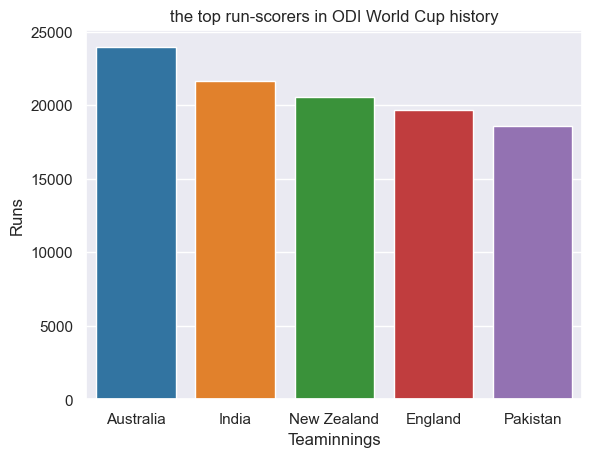

In [52]:
a = odi_bat.groupby("Teaminnings")[["Runs"]].sum().sort_values(by="Runs",ascending=False).head().reset_index()
sns.barplot(a,x="Teaminnings",y="Runs",palette="tab10")
plt.title("the top run-scorers in ODI World Cup history")
plt.show()

> Australia scored the highest runs in ODI  
> Followed by India,New Zealand

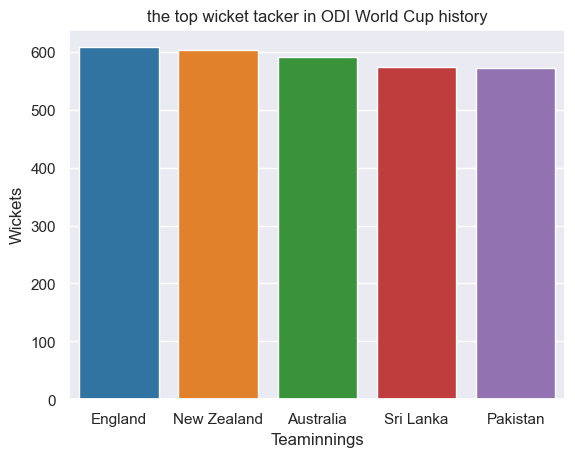

In [54]:
a = odi_bow.groupby("Teaminnings")[["Wickets"]].sum().sort_values(by="Wickets",ascending=False).head().reset_index()
sns.barplot(a,x="Teaminnings",y="Wickets",palette="tab10")
plt.title("the top wicket tacker in ODI World Cup history")
plt.show()

> England is the top team in taking wickets  in ODI  
> Followed by New Zealand, Australia

### Who are the top-scorers and wicket-takers in ODI World Cup in Individual seasons?

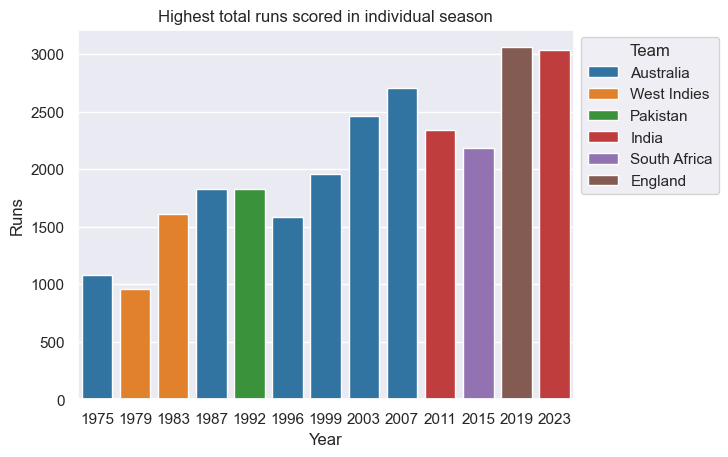

In [57]:
a = odi_bat.groupby(["Year","Teaminnings"])[["Runs"]].sum().sort_values(by=["Year","Runs"],ascending=[True,False]).reset_index()
a = a.groupby("Year").first().sort_values(by = "Runs",ascending=False)
sns.barplot(x="Year",y="Runs",data=a,hue="Teaminnings",palette="tab10")
plt.title("Highest total runs scored in individual season")
plt.legend(title="Team",bbox_to_anchor=(1, 1))
plt.show()

> Australia scored top runs in many ODI seasons 

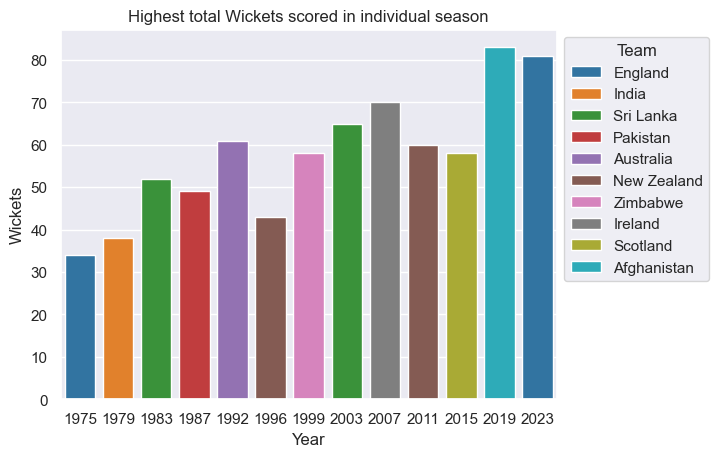

In [59]:
a = odi_bow.groupby(["Year","Teaminnings"])[["Wickets"]].sum().sort_values(by=["Year","Wickets"],ascending=[True,False]).reset_index()
a = a.groupby("Year").first().sort_values(by = "Wickets",ascending=False)
sns.barplot(x="Year",y="Wickets",data=a,hue="Teaminnings",palette="tab10")
plt.title("Highest total Wickets scored in individual season")
plt.legend(title="Team",bbox_to_anchor=(1, 1))
plt.show()

### Player who scored Highest Runs in history of ODI's

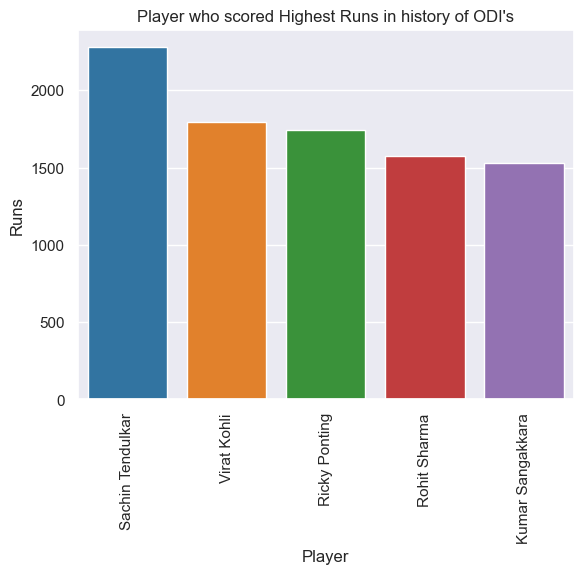

In [61]:
a = odi_bat.groupby(["Player"])[["Runs"]].sum()
sns.barplot(a.sort_values(by="Runs",ascending=False).head(),x="Player",y="Runs",palette="tab10")
plt.title("Player who scored Highest Runs in history of ODI's")
plt.xticks(rotation=90)
plt.show()

> **Sachin Tendulkar, Virat Kohili, Ricky Ponting, Rohit Sharma and Kumar Sangakkara**  
> Are the top 5 Players, Who scored the Highest runs in the history of ODI.

### Who are the top 5 player,Who scored top runs in ODI World Cup in individual seasons?

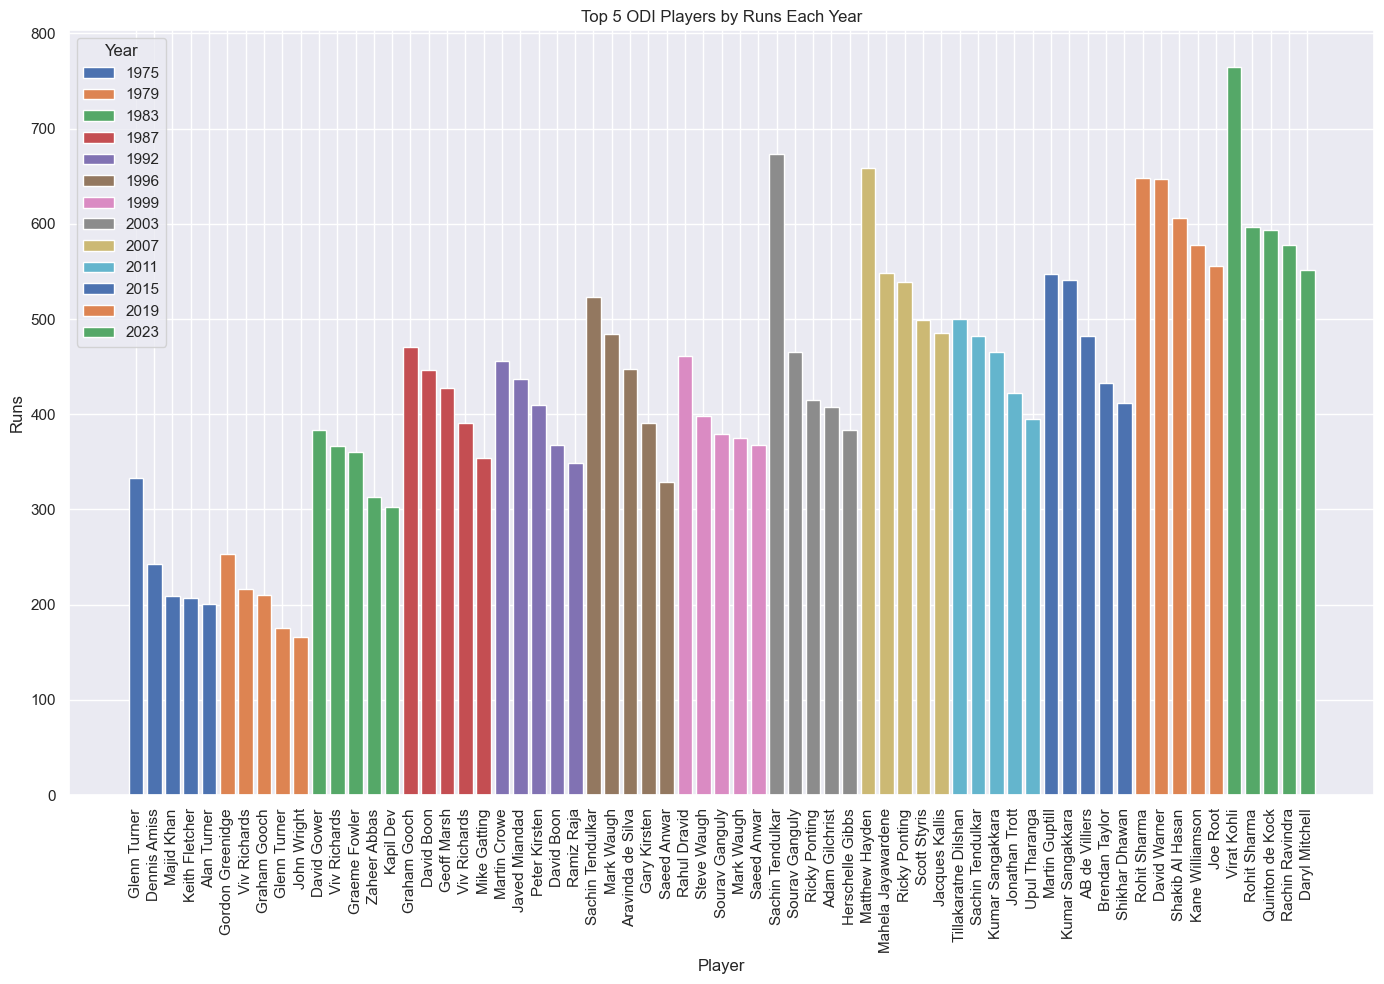

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'odi_bat' is your dataframe
a = odi_bat.groupby(["Year", "Player"])[["Runs"]].sum().reset_index()

# Sorting the dataframe by 'Year' and 'Runs' in descending order
a = a.sort_values(["Year", "Runs"], ascending=[True, False])

# Grouping by 'Year' and taking the top 5 players
top_5_players_per_year = a.groupby("Year").head(5)

# Creating a new column for the x-axis labels
top_5_players_per_year["Year_Player"] = top_5_players_per_year["Year"].astype(str) + " - " + top_5_players_per_year["Player"]

# Plotting the data
fig, ax = plt.subplots(figsize=(14, 10))

# Unique years in the dataset
years = top_5_players_per_year["Year"].unique()

# Plotting year-wise
for year in years:
    yearly_data = top_5_players_per_year[top_5_players_per_year["Year"] == year]
    ax.bar(yearly_data["Year_Player"], yearly_data["Runs"], label=year)

ax.set_xlabel("Player")
ax.set_ylabel("Runs")
ax.set_title("Top 5 ODI Players by Runs Each Year")
ax.set_xticklabels(top_5_players_per_year["Player"], rotation=90)
ax.legend(title="Year")
plt.tight_layout()
plt.show()


> These are the players who scored top in individual seasons.

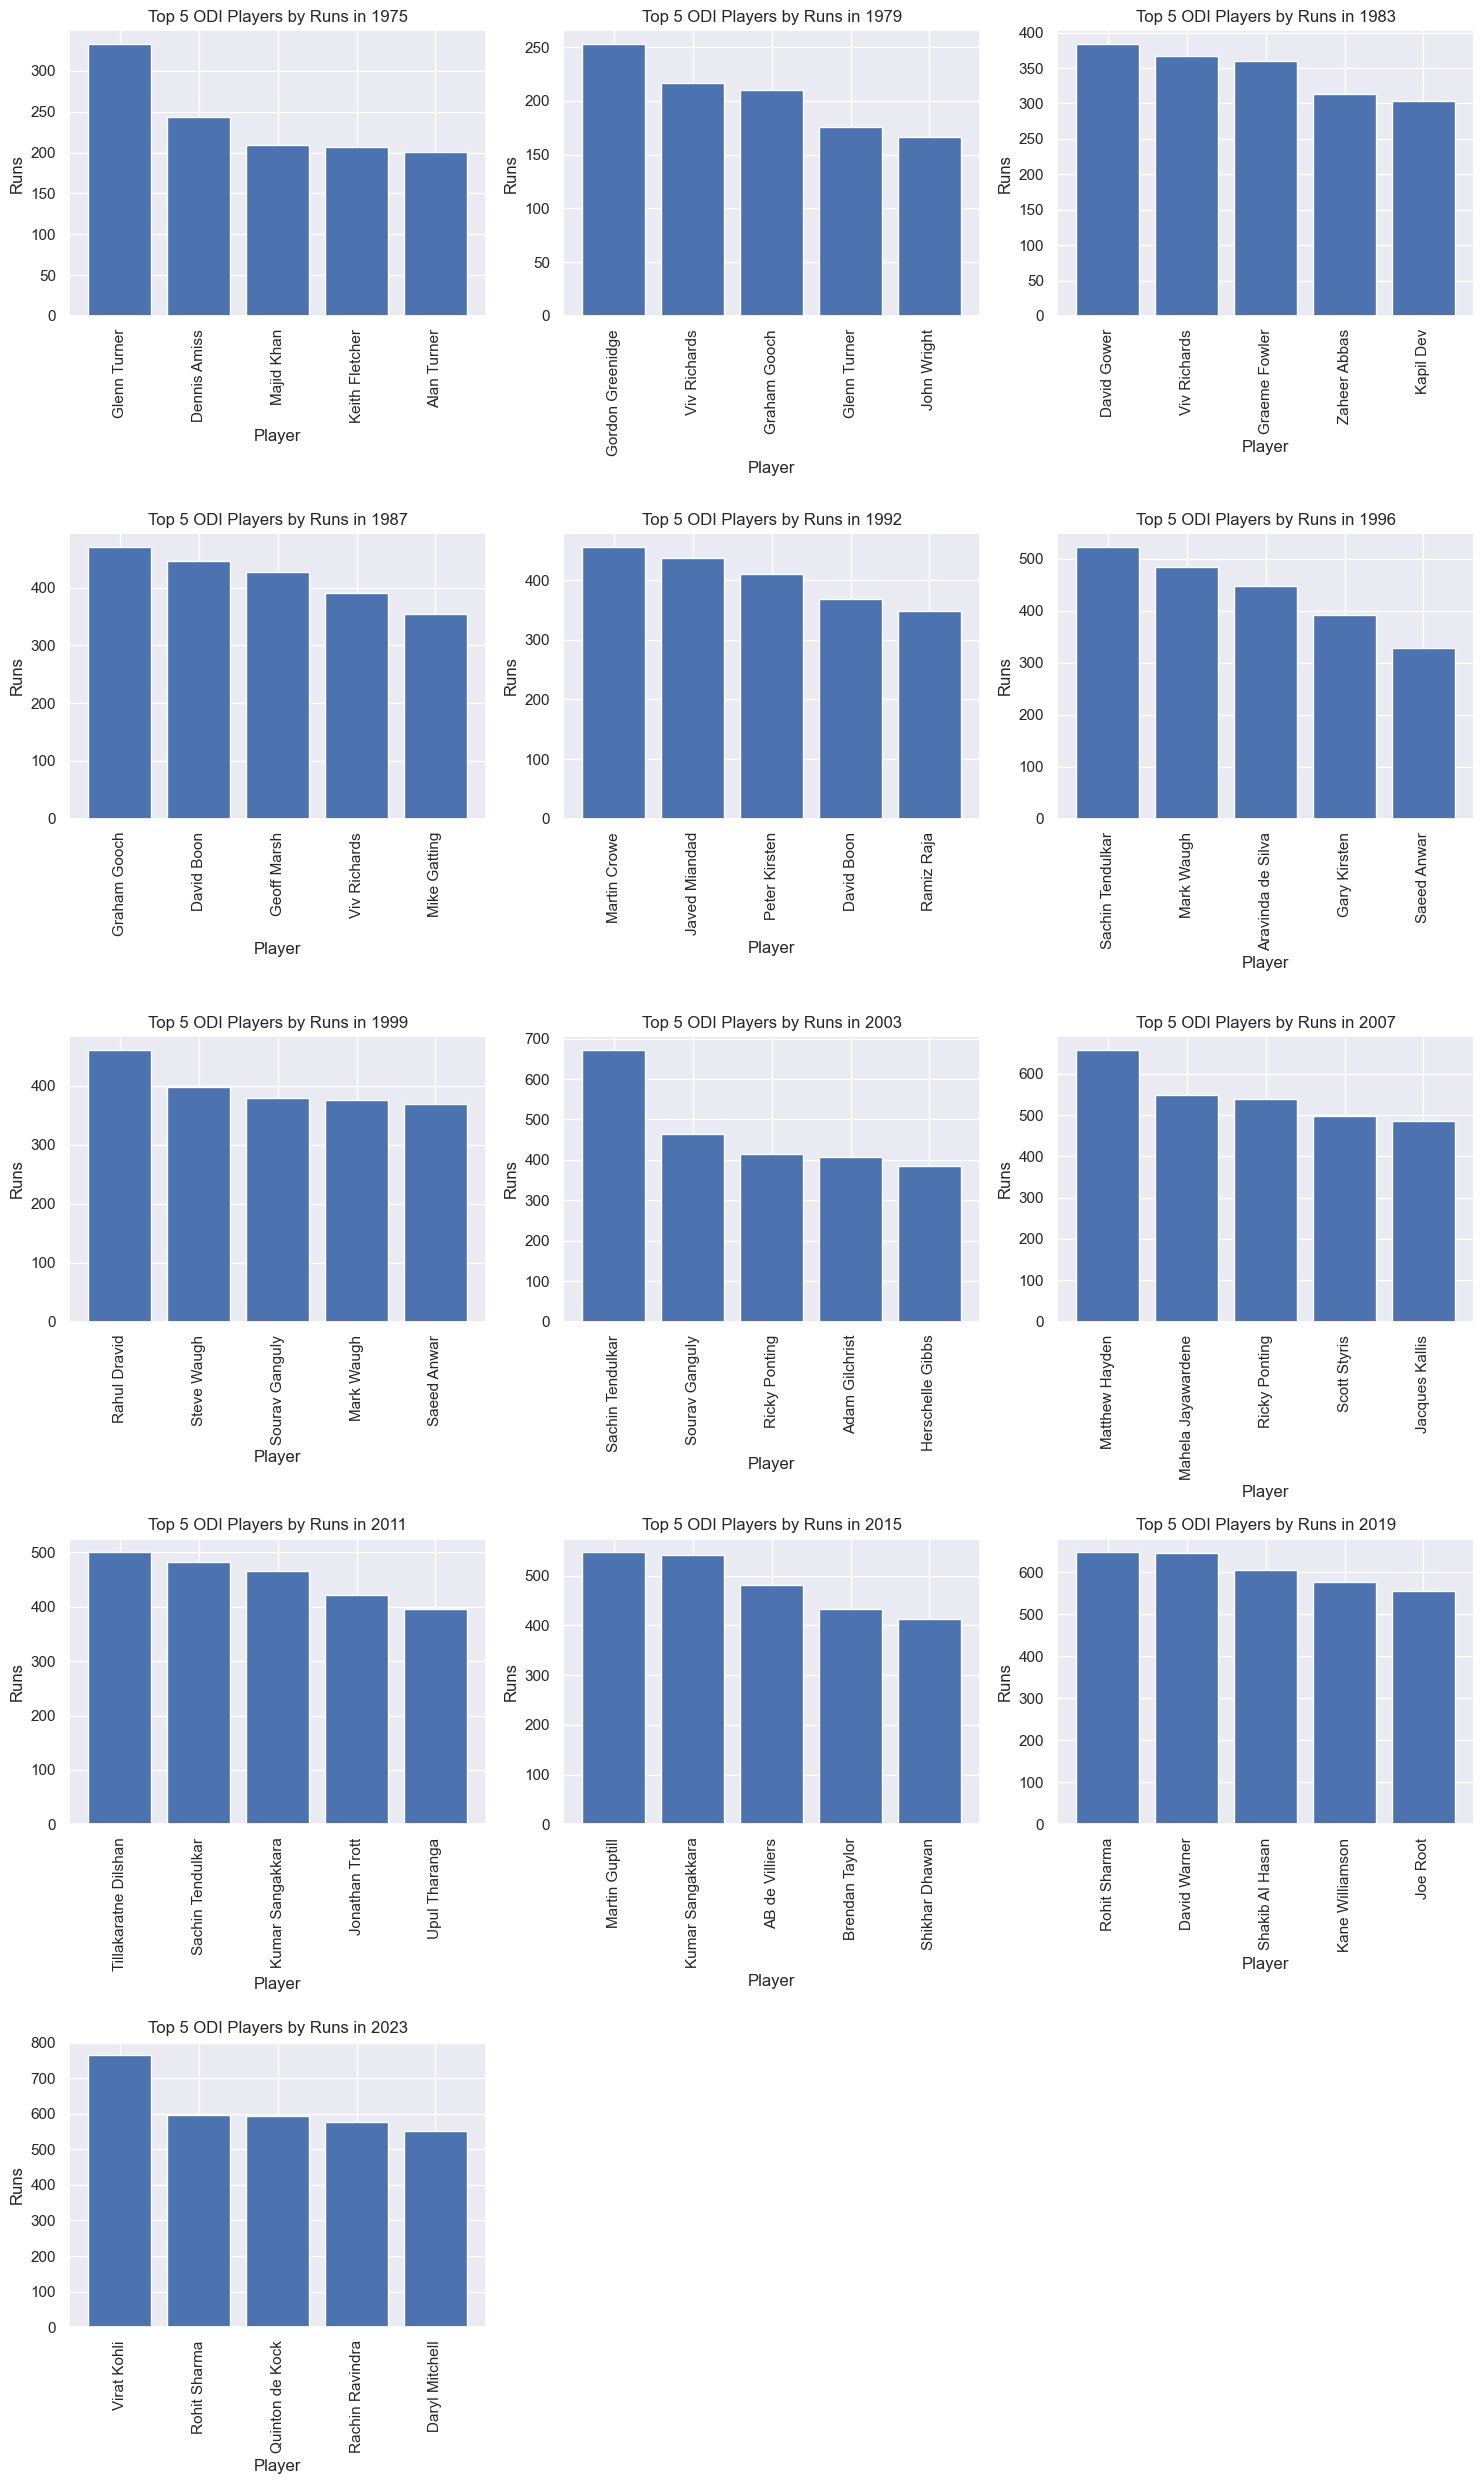

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'odi_bat' is your dataframe
a = odi_bat.groupby(["Year", "Player"])[["Runs"]].sum().reset_index()

# Sorting the dataframe by 'Year' and 'Runs' in descending order
a = a.sort_values(["Year", "Runs"], ascending=[True, False])

# Grouping by 'Year' and taking the top 5 players
top_5_players_per_year = a.groupby("Year").head(5)

# Unique years in the dataset
years = top_5_players_per_year["Year"].unique()

# Determine the number of rows and columns for the subplots
n_rows = (len(years) // 3) + (len(years) % 3)
n_cols = 3

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting data for each year in separate subplots
for i, year in enumerate(years):
    yearly_data = top_5_players_per_year[top_5_players_per_year["Year"] == year]
    axes[i].bar(yearly_data["Player"], yearly_data["Runs"])
    axes[i].set_xlabel("Player")
    axes[i].set_ylabel("Runs")
    axes[i].set_title(f"Top 5 ODI Players by Runs in {year}")
    axes[i].tick_params(axis='x', rotation=90)

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


> In the above graph we can see the top 5 batsmen. Who scored top runs in individual seasons.

### Who are the top  wicket-takers in ODI World Cup history?

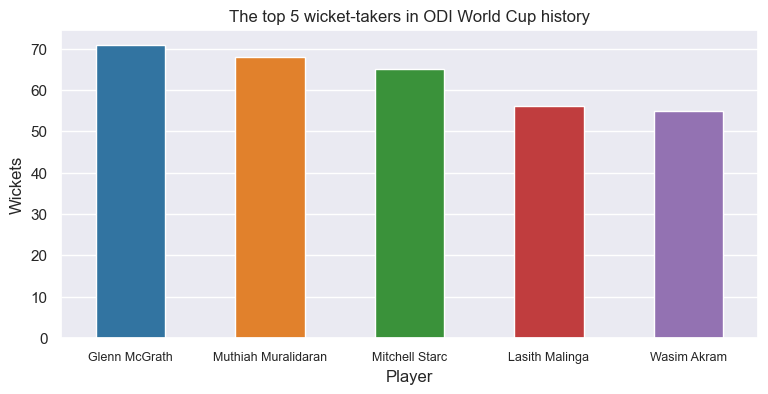

In [69]:
wickets = odi_bow.groupby(["Player"])[["Wickets"]].sum().sort_values(by=["Wickets"],ascending=False).reset_index()

plt.figure(figsize=(9,4))
sns.barplot(x="Player", y="Wickets",data=wickets.head(),gap=0.5,width=1,palette="tab10")
plt.xticks(rotation=0,size=9)
plt.title("The top 5 wicket-takers in ODI World Cup history")
plt.show()

> **Glenn McGrath, Muthiah Muralidaran, and Mitchell Starc** are the top 3 wicket takers in ODI's History.

### Who is the top wicket-takers in ODI World Cup in each Season?

In [72]:
wickets = odi_bow.groupby(["Year","Player"])[["Wickets"]].sum().sort_values(by=["Year","Wickets"],ascending=[True,False]).reset_index()
wickets = wickets.groupby("Year").head(1).sort_values(by="Wickets",ascending=False)

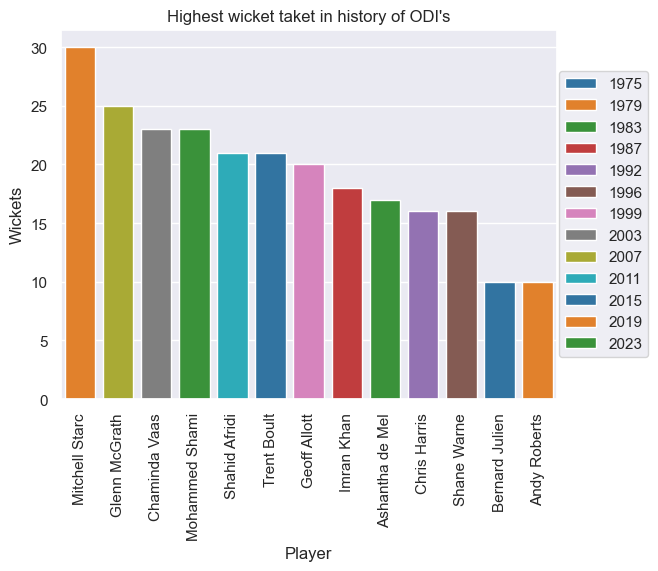

In [73]:
sns.barplot(wickets,x="Player",y="Wickets",palette="tab10", hue = "Year")

plt.title("Highest wicket taket in history of ODI's")
plt.xticks(rotation=90)
plt.legend(loc ='right', bbox_to_anchor=(1.2,0.5))
plt.show()

In [74]:
def bst(x):
    try:
        return eval(x)
    except:
        return 0
odi_bow["Bowling Figure"] = odi_bow["Bowling Figure"].apply(bst)

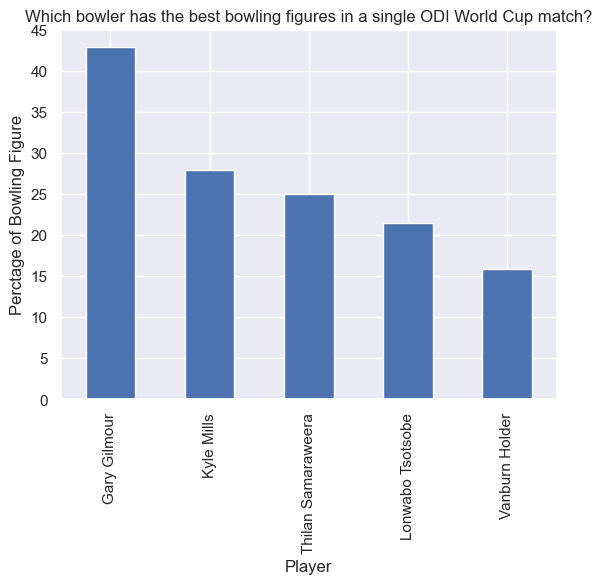

In [75]:
best_bowling = odi_bow.groupby("Player")["Bowling Figure"].mean()*100
best_bowling.sort_values(ascending=False).head().plot(kind="bar")
plt.title("Which bowler has the best bowling figures in a single ODI World Cup match?")
plt.ylabel("Perctage of Bowling Figure")
plt.show()

### Which match had the closest finish in terms of runs or wickets, and what were the details?

In [77]:
#closest finish in terms of runs
cst_run_finish = odi[odi["Runs/Wickets"] == "run"]


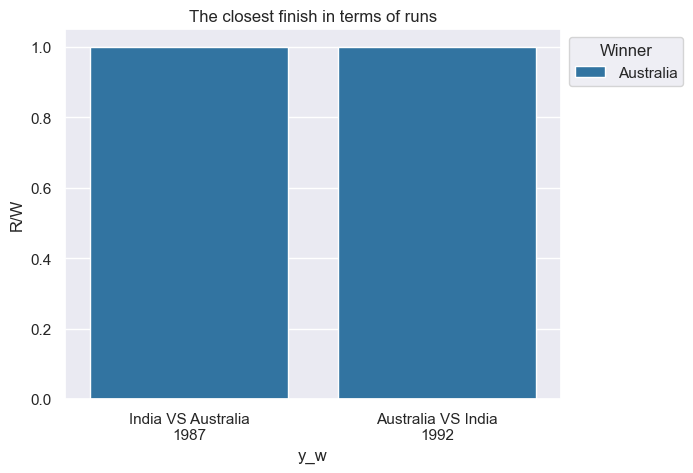

In [78]:
cst_run_finish["y_w"] = cst_run_finish["Team 1"] + " VS " + cst_run_finish["Team 2"] + "\n" +cst_run_finish["Year"].astype("str")
sns.barplot(data = cst_run_finish,x="y_w",y = "R/W",hue="Winner",palette="tab10")
plt.title("the closest finish in terms of runs".capitalize())
plt.legend(loc='best', bbox_to_anchor=(1, 1),title = "Winner")
plt.show()

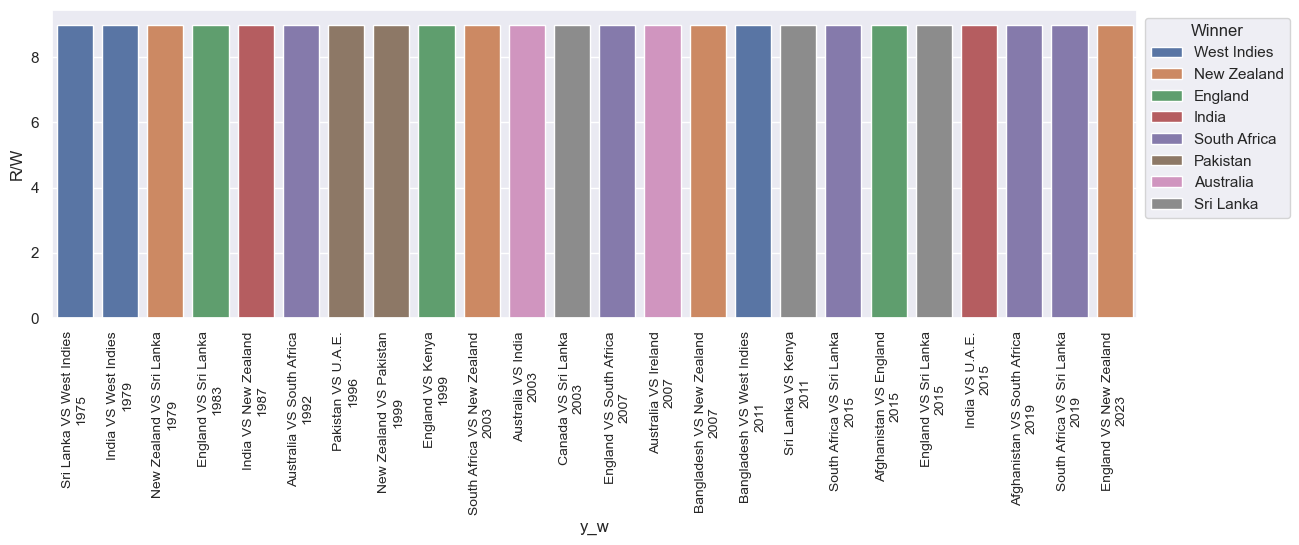

In [79]:
#closest finish in terms of Wickets
plt.figure(figsize=(14,4))
cst_wic_finish = odi[(odi["Runs/Wickets"] == "wickets") & (odi["R/W"] == 9)]
cst_wic_finish["y_w"] = cst_wic_finish["Team 1"] + " VS " + cst_wic_finish["Team 2"] + "\n" +cst_wic_finish["Year"].astype("str")
sns.barplot(data=cst_wic_finish.sort_values(by="Year"), x = "y_w",y="R/W",hue="Winner")
plt.xticks(rotation=90,size=10)
plt.legend(loc='best', bbox_to_anchor=(1, 1),title="Winner")
plt.show()

### How have the average scores in ODI World Cup matches changed over the years?

In [198]:
a = odi_bat.groupby(["Year","Teaminnings"])[["Id","Runs"]].agg({"Id":"nunique","Runs":"sum"})
a["mean"] = a["Runs"]/a["Id"]


In [200]:
a = a.reset_index()

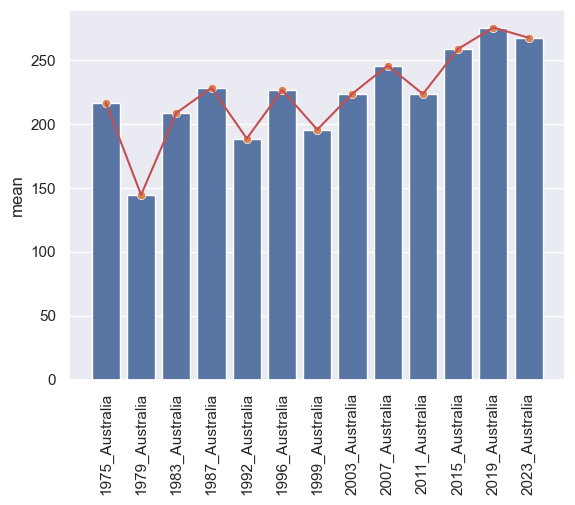

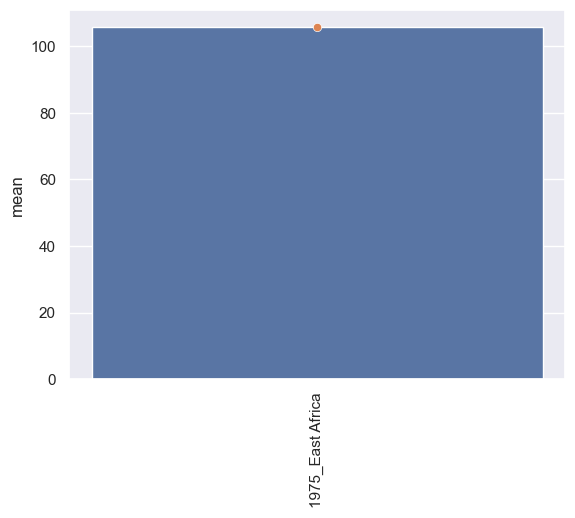

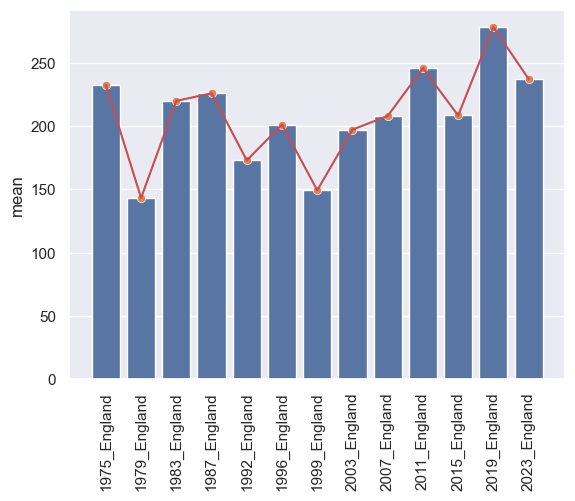

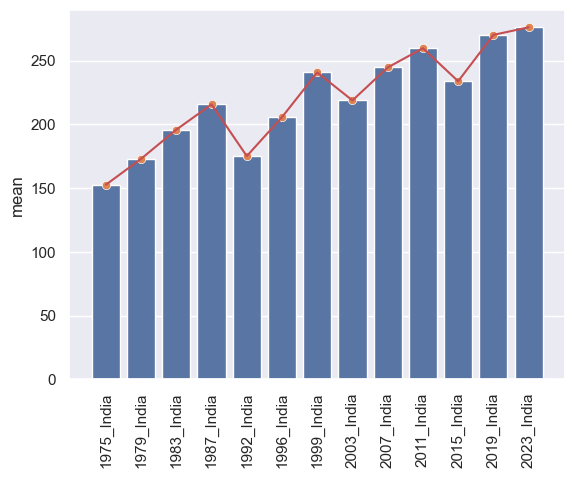

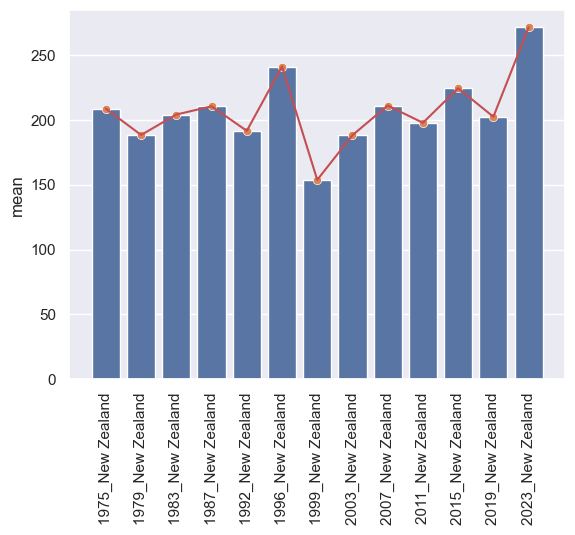

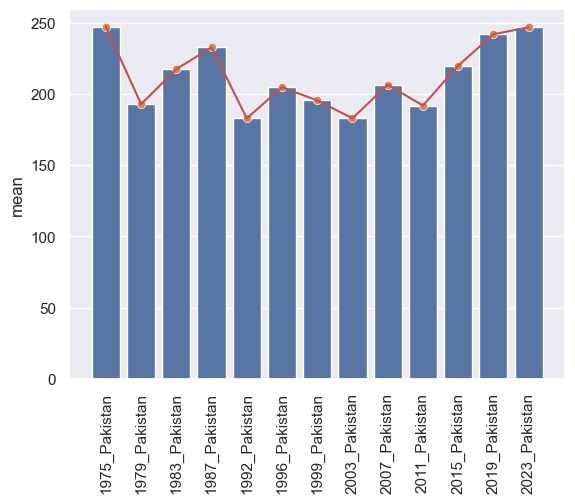

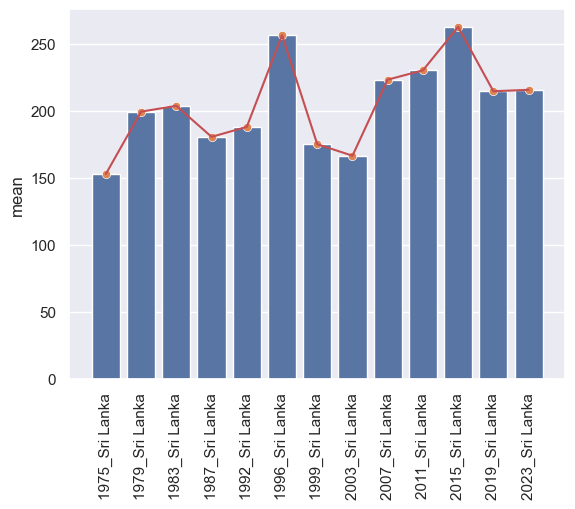

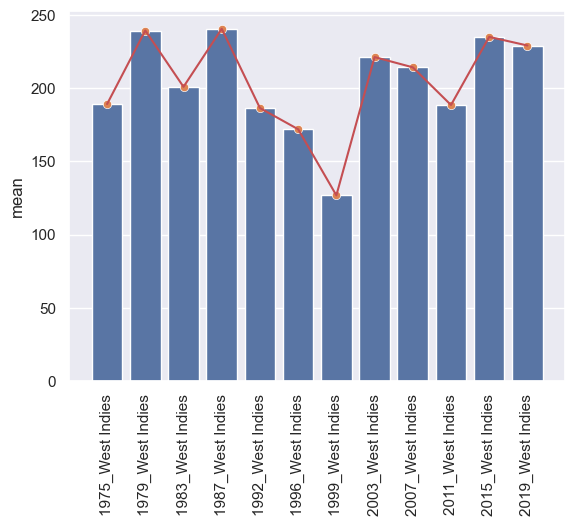

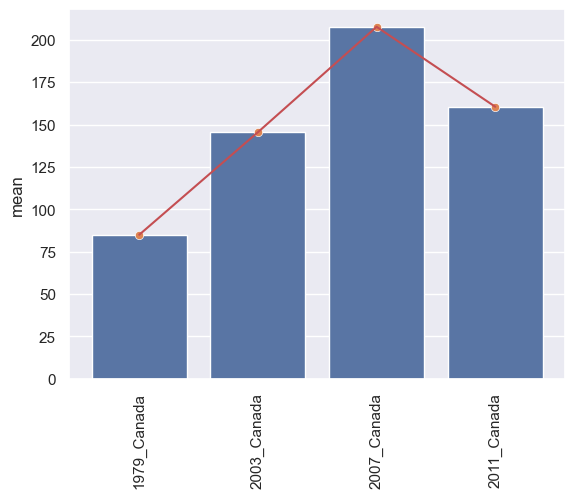

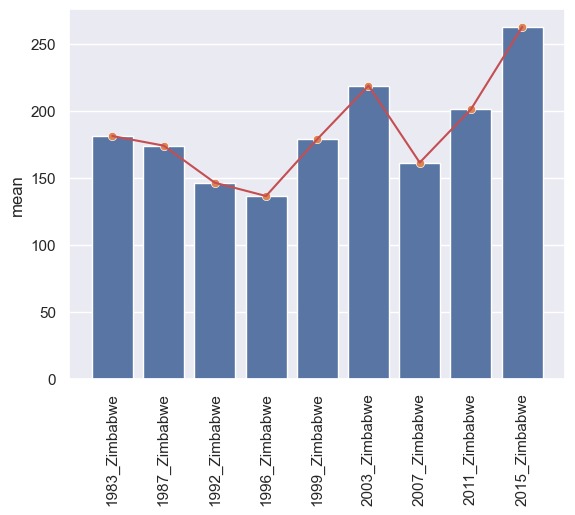

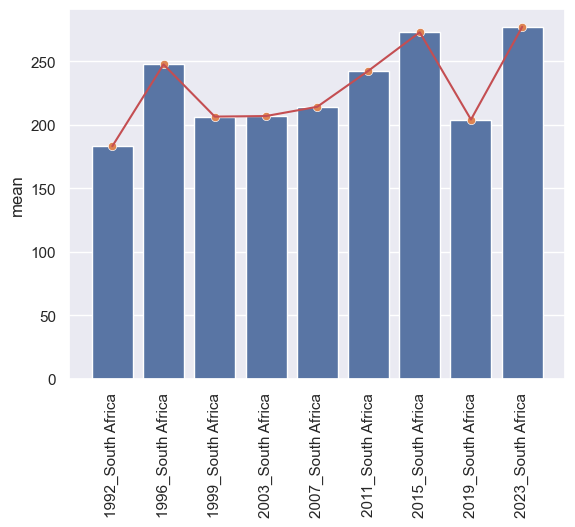

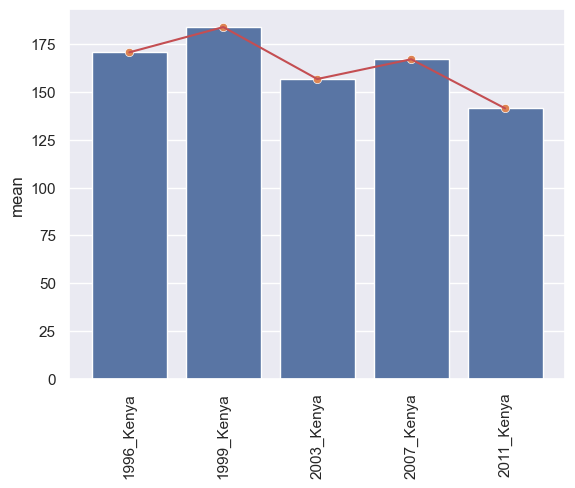

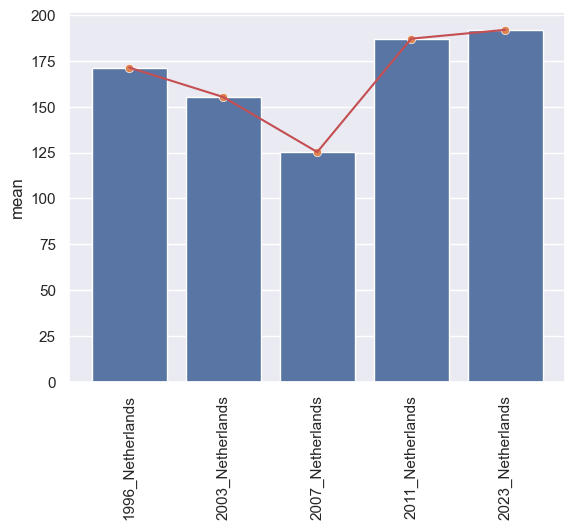

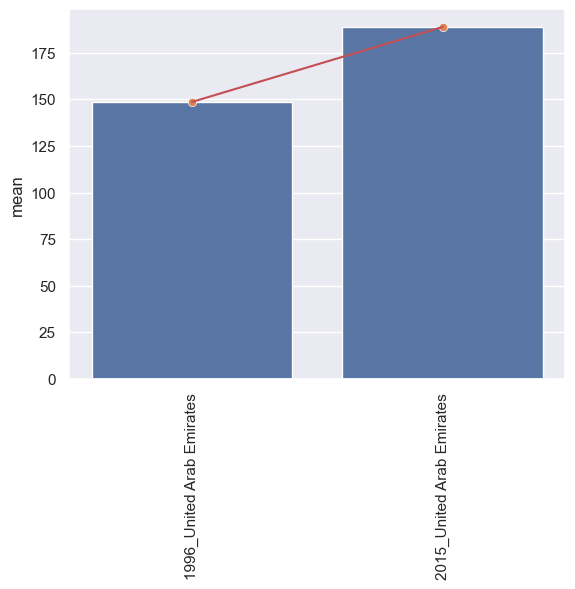

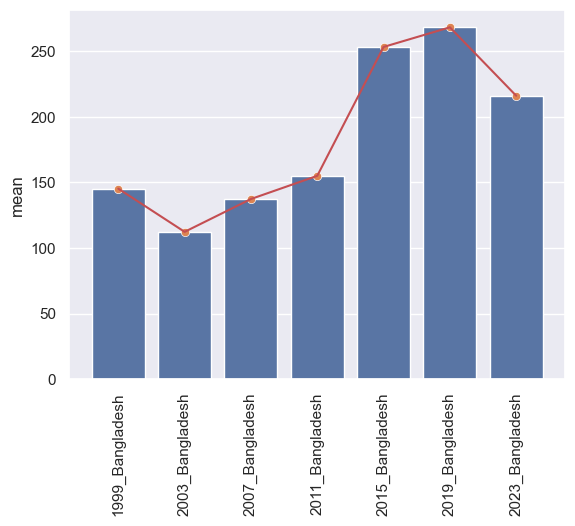

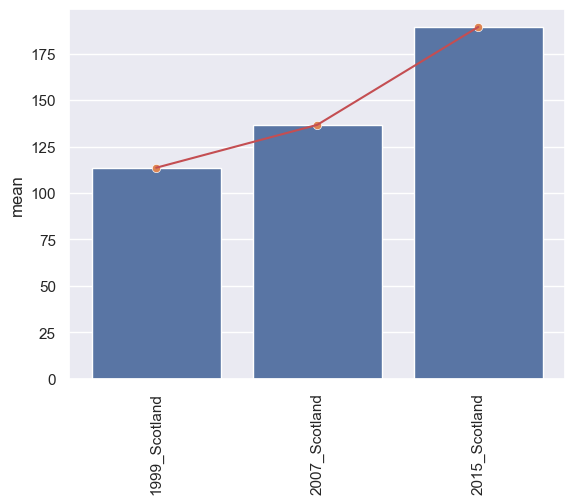

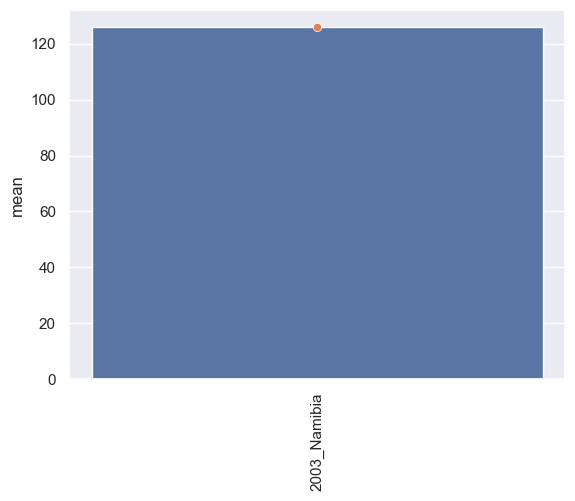

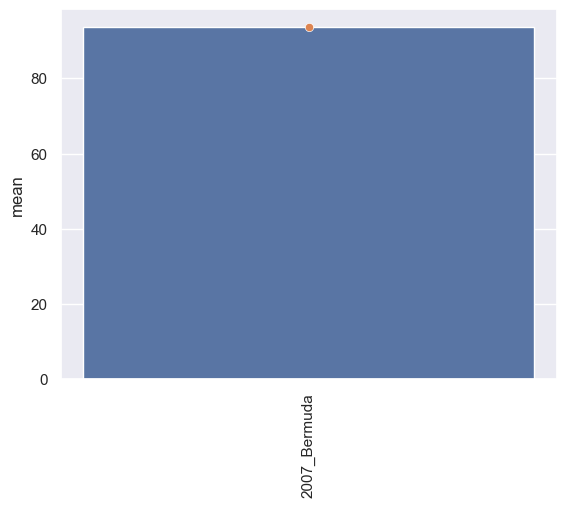

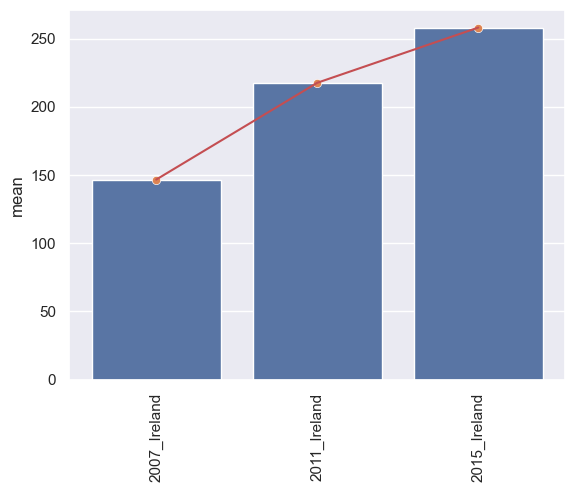

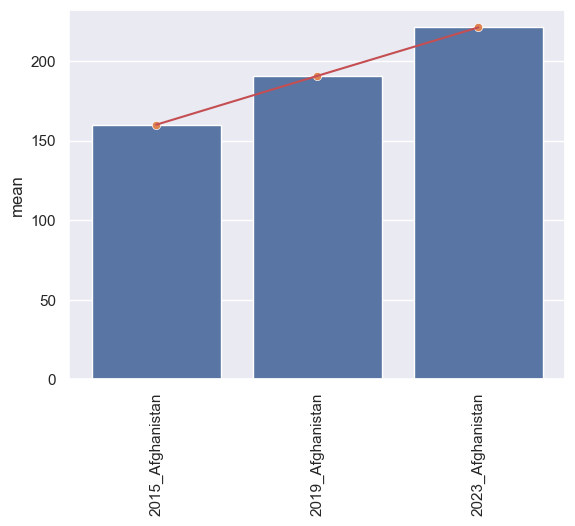

In [202]:
teams = a["Teaminnings"].unique()
nrows = (len(teams)//3 )+ 1
ncols = 3

a["y_t"] = a["Year"].astype("str") + "_" + a["Teaminnings"]
for i,team in enumerate(teams):
    data = a[a["Teaminnings"] == team]
    sns.lineplot(x=data["y_t"], y=data["mean"],color="r")
    sns.barplot(x=data["y_t"], y=data["mean"])
    sns.scatterplot(x=data["y_t"], y=data["mean"])
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.show()


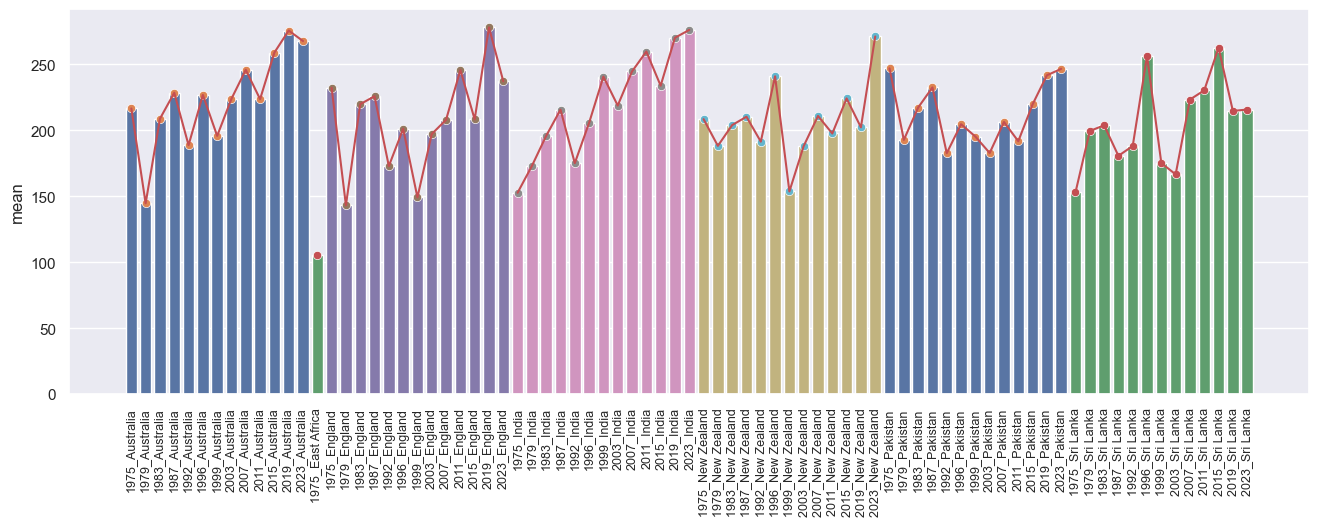

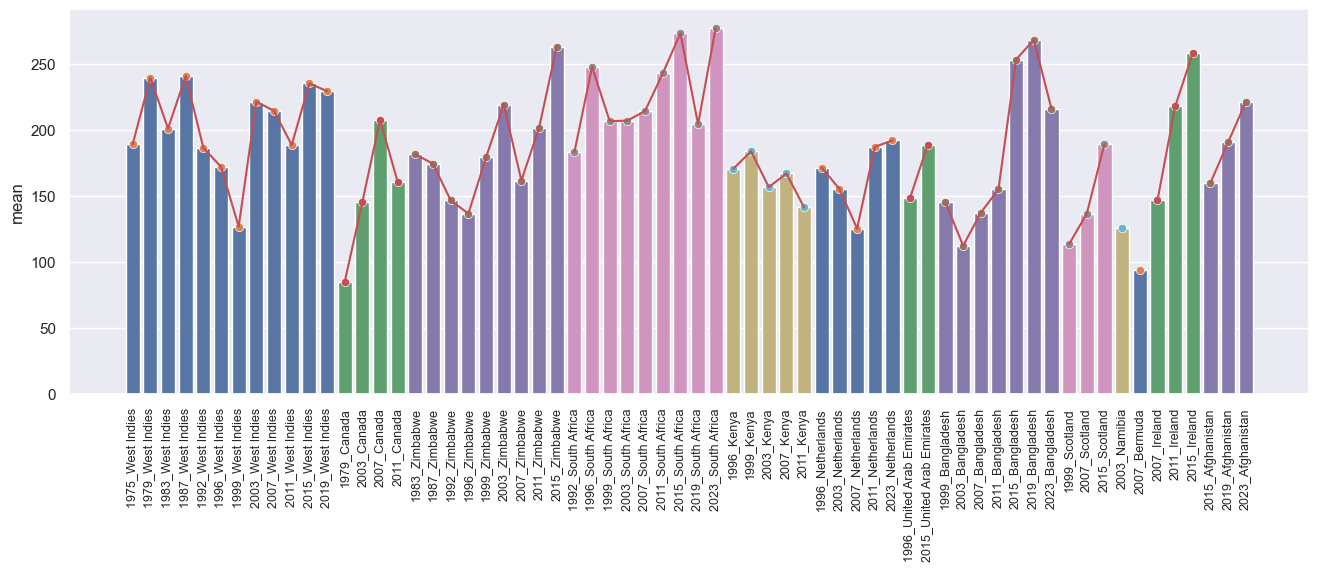

In [244]:
teams = a["Teaminnings"].unique()
nrows = (len(teams)//3 )+ 1
ncols = 3
plt.figure(figsize=(16,5))
a["y_t"] = a["Year"].astype("str") + "_" + a["Teaminnings"]
for team in teams[:7]:
    data = a[a["Teaminnings"] == team]
    sns.lineplot(x=data["y_t"], y=data["mean"],color="r")
    sns.barplot(x=data["y_t"], y=data["mean"])
    sns.scatterplot(x=data["y_t"], y=data["mean"])
plt.xticks(rotation=90, size=9)
plt.xlabel(None)
plt.show()
plt.figure(figsize=(16,5))
for team in teams[7:]:
    data = a[a["Teaminnings"] == team]
    sns.lineplot(x=data["y_t"], y=data["mean"],color="r")
    sns.barplot(x=data["y_t"], y=data["mean"])
    sns.scatterplot(x=data["y_t"], y=data["mean"])
plt.xticks(rotation=90, size=9)
plt.xlabel(None)
plt.show()


### What are the trends in the number of centuries and half-centuries scored over the years?

In [85]:
df = pd.read_csv(r"../Data Cleaning/Data/Batting Statistics.csv")

In [86]:
# Adding columns century and half centure
odi_bat["Centurie"] = odi_bat["Runs"].apply(lambda x: 1 if x>=100 else 0)
odi_bat["Half Centurie"] = odi_bat["Runs"].apply(lambda x: 1 if x>=50 else 0)


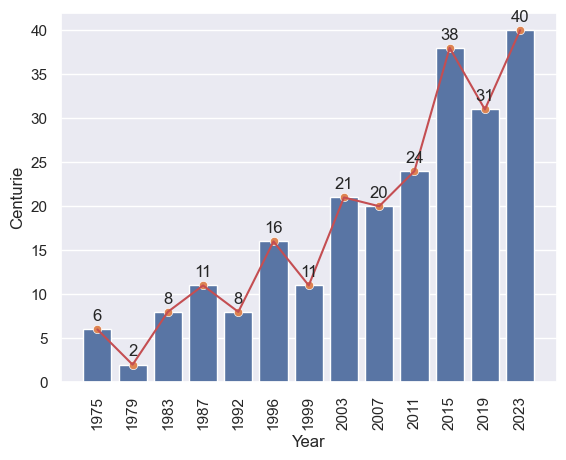

In [87]:
a = odi_bat.groupby(["Year","Id"])[["Player","Centurie"]].agg({"Player":"first","Centurie":"sum"})
a = a.groupby("Year")[["Centurie"]].sum()
a = a.reset_index()
ar = sns.barplot(data=a, x = "Year", y = "Centurie")
sns.lineplot(data=a, x = a.index, y = "Centurie",color="r")
sns.scatterplot(data=a, x = a.index, y = "Centurie")
plt.xticks(rotation=90)
for i in ar.containers:
    ar.bar_label(i,padding=4)
plt.show()

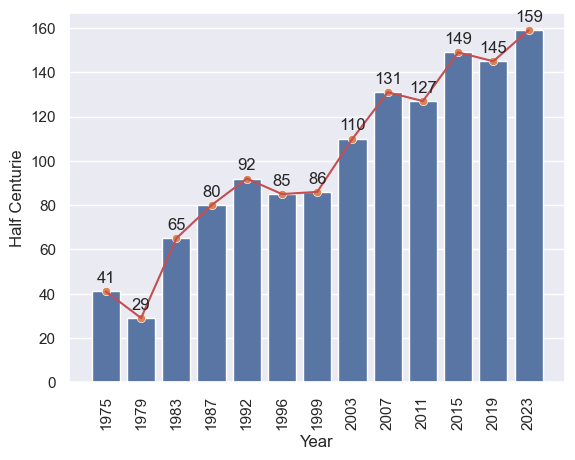

In [88]:
a = odi_bat.groupby(["Year","Id"])[["Player","Half Centurie"]].agg({"Player":"first","Half Centurie":"sum"})
a = a.groupby("Year")[["Half Centurie"]].sum()
a = a.reset_index()
ar = sns.barplot(data=a, x = "Year", y = "Half Centurie")
sns.lineplot(data=a, x = a.index, y = "Half Centurie",color="r")
sns.scatterplot(data=a, x = a.index, y = "Half Centurie")
plt.xticks(rotation=90)
for i in ar.containers:
    ar.bar_label(i,padding=4)
plt.show()

> - The trend of Half Centuries and Centuries have been increased to **41 to 159** and **6 to 40** respectively.

### What are the trends in the number of centuries and half-centuries scored over the years in team?

In [91]:
a = odi_bat.groupby(["Year","Teaminnings"])[["Centurie"]].sum()
a = a.reset_index(level=1)

In [92]:
year = a.index.unique()

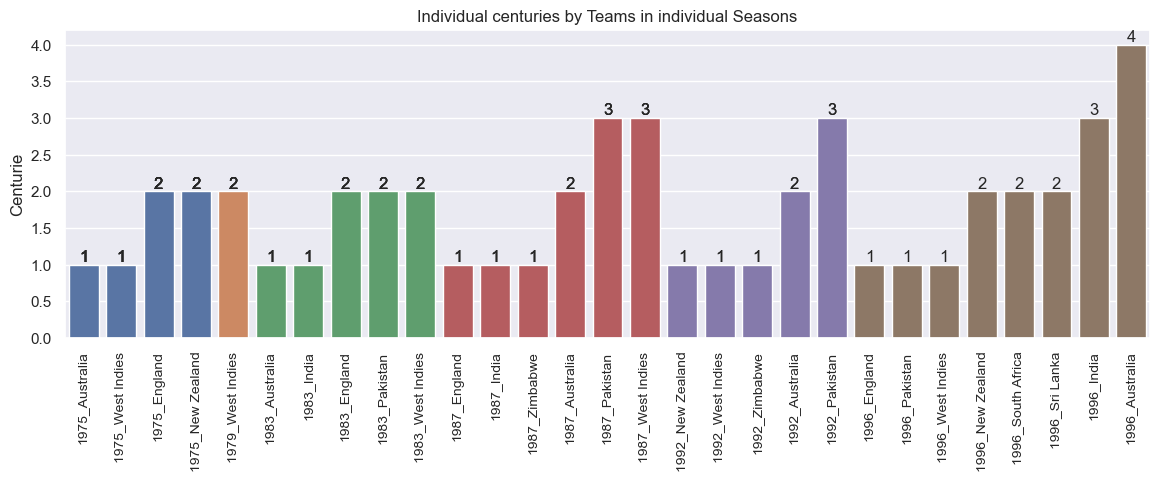

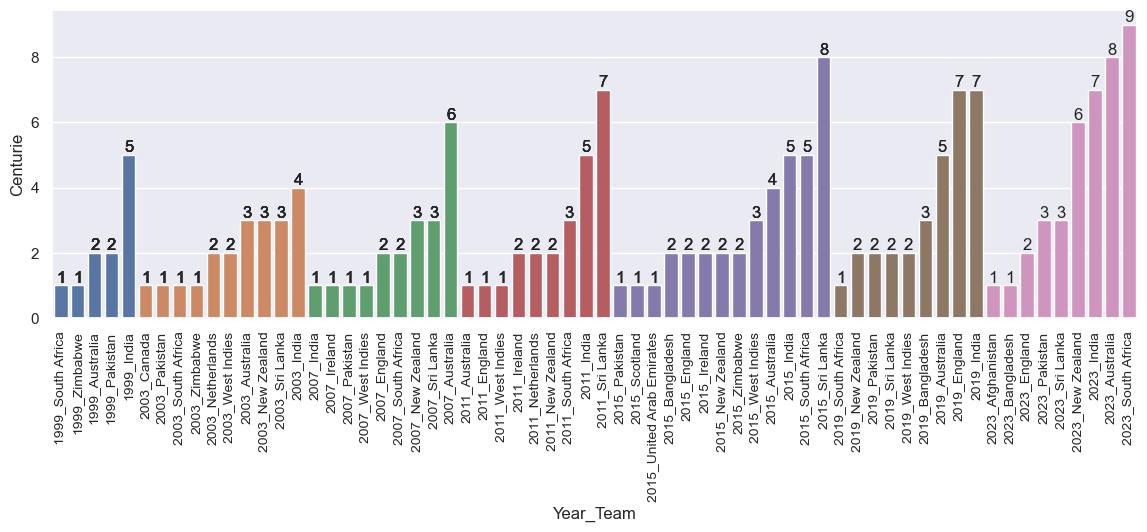

In [93]:
a["y_t"] = a.index.astype(str) + "_" +a["Teaminnings"]
plt.figure(figsize=(14,4))
for i in year[:int(len(year)/2)]:
    df = a.loc[i][a.loc[i]["Centurie"]>0].sort_values(by=["Centurie","Year"])
    ar = sns.barplot(data=df, x = "y_t", y = "Centurie")
    plt.xticks(rotation=90,size=10)
    plt.title("Individual centuries by Teams in individual Seasons")
    for j in ar.containers:
        ar.bar_label(j)
    plt.xlabel(None)
plt.show()
plt.figure(figsize=(14,4))
for i in year[int(len(year)/2):]:
    df = a.loc[i][a.loc[i]["Centurie"]>0].sort_values(by=["Centurie","Year"])
    ar = sns.barplot(data=df, x = "y_t", y = "Centurie")
    plt.xticks(rotation=90,size=10)
    for j in ar.containers:
        ar.bar_label(j)
plt.xlabel("Year_Team")
plt.show()

> - In Above graph we can see individual Teams by Year. How many centuries they have scored.

### Which Team scored highest centuries in ODI Histtory.

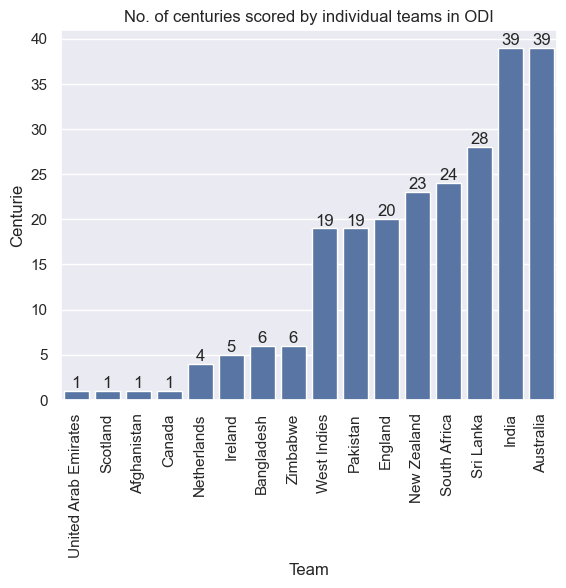

In [96]:
a = odi_bat.groupby(["Teaminnings"])[["Centurie"]].sum().sort_values(by="Centurie")
a = a.reset_index()
a = a[a['Centurie']>0]
ar = sns.barplot(data=a,x="Teaminnings",y="Centurie")
plt.xticks(rotation=90)
plt.xlabel("Team")
plt.title("No. of centuries scored by individual teams in ODI")
for i in ar.containers:
    ar.bar_label(i)
plt.show()

> - **Australia** and **India** achived more number of centuries in ODI History.

### Who scored highest number of centuries in ODI history

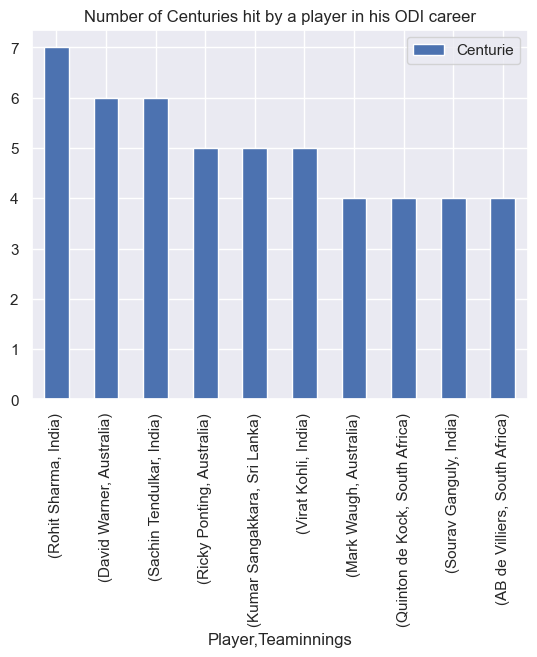

In [99]:
a = odi_bat.groupby(["Teaminnings","Player"])[["Centurie"]].sum()
a = a.sort_values(by=["Teaminnings","Centurie"])
a = a.reset_index()
a = a.groupby("Player")[["Teaminnings","Centurie"]].agg({"Teaminnings":"first","Centurie":"sum"})

a = a.reset_index()
a = a.groupby(["Player","Teaminnings"])[["Centurie"]].max()

a = a[a["Centurie"]>0]
a = a.sort_values(by="Centurie", ascending=False)
a.head(10).plot(kind="bar")
plt.title("Number of Centuries hit by a player in his ODI career")
plt.show()

### Who scored highest number of centuries and whats the average balls in ODI history

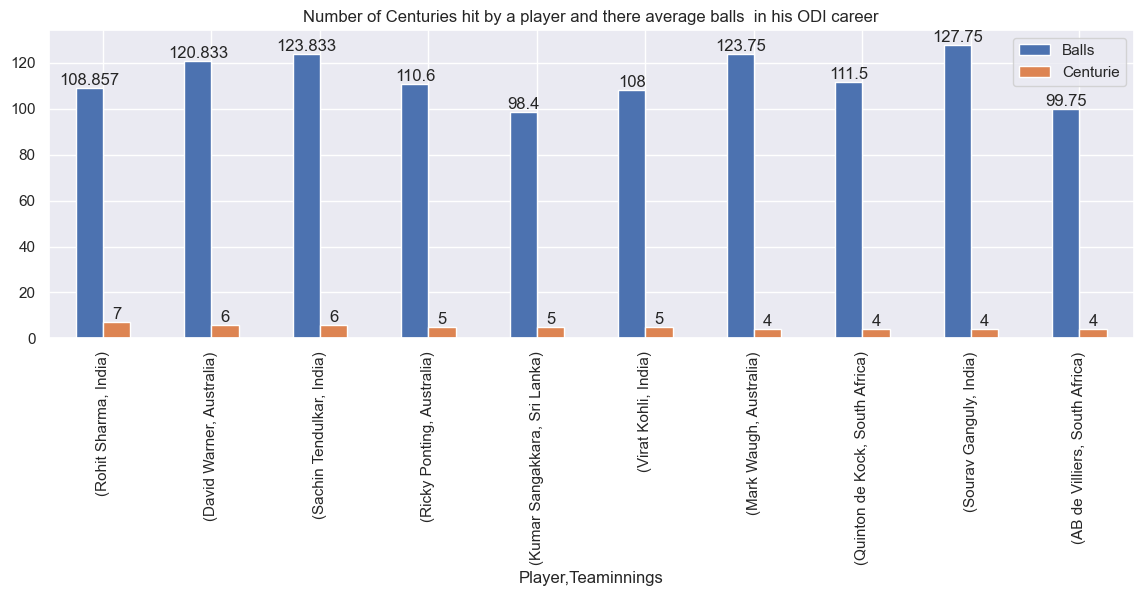

In [101]:
a = odi_bat[odi_bat["Centurie"]>0]
a = a.groupby(["Teaminnings","Player"])[["Centurie","Balls"]].agg({"Centurie":'sum',"Balls":'mean'})
a = a[a["Centurie"]>0]
a = a.sort_values(by=["Teaminnings","Centurie"])
a = a.reset_index()
a = a.groupby("Player")[["Teaminnings","Centurie","Balls"]].agg({"Teaminnings":"first","Centurie":"sum","Balls":"mean"})

a = a.reset_index()
a = a.groupby(["Player","Teaminnings"])[["Centurie","Balls"]].agg({"Balls":"mean","Centurie":"sum"})

a = a.sort_values(by="Centurie", ascending=False)
ar = a.head(10).plot(kind="bar")
for i in ar.containers:
    ar.bar_label(i)
ar.figure.set_size_inches(14,4)
plt.title("Number of Centuries hit by a player and there average balls  in his ODI career")
plt.show()


> **In above graph we can see scored highest number of centuries and whats the average balls in ODI history**
> - **Rohit Sharma** : Scored **7** , Average Balls : **109**

### How has the role of all-rounders evolved in the ODI World Cup over the years?

In [104]:
odi_player = pd.read_csv("../Data/Player Info.csv")

In [105]:
odi_player = odi_player.iloc[:,:7]
odi_player.head()

,Full Name,Name,Born,Age,Batting Style,Bowling Style,Playing Role
0,Dennis Keith Lillee,Dennis Lillee,"July 18, 1949, Subiaco, Perth, Western Australia",75y 128d,Right hand Bat,Right arm Fast,Bowler
1,Gary John Gilmour,Gary Gilmour,"June 26, 1951, Waratah, New South Wales",NaN,Left hand Bat,Left arm Fast medium,NaN
2,Maxwell Henry Norman Walker,Max Walker,"September 12, 1948, West Hobart, Tasmania",NaN,Right hand Bat,Right arm Fast medium,Bowler
3,Jeffrey Robert Thomson,Jeff Thomson,"August 16, 1950, Greenacre, Sydney, New South ...",74y 99d,Right hand Bat,Right arm Fast,Bowler
4,Geoffrey Graham Arnold,Geoff Arnold,"September 03, 1944, Earlsfield, Surrey",80y 81d,Right hand Bat,Right arm Fast medium,Bowler


In [106]:
odi_all_rund = odi_player[odi_player["Playing Role"]=="Allrounder"]
odi_all_rund.rename(columns={"Name":"Player"},inplace=True)

In [107]:
odi_all_rund  = odi_all_rund[["Player"]].merge(odi_bat,on="Player")

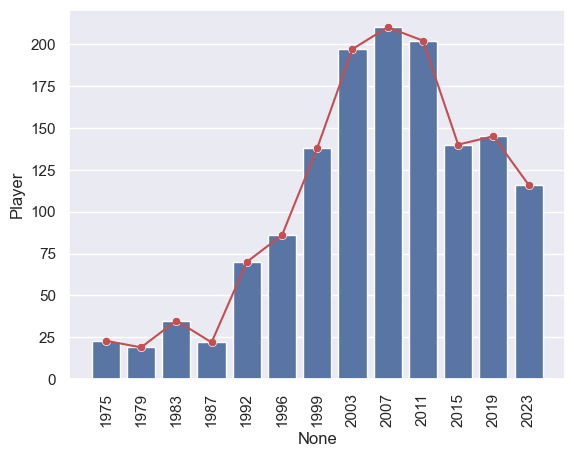

In [108]:
a = odi_all_rund.groupby(["Year"])["Player"].count()
a = a.reset_index()
ar = sns.barplot(data=a,x=a.index,y="Player",)
sns.lineplot(data=a,x=a.index,y="Player",color="r")
sns.scatterplot(data=a,x=a.index,y="Player",color="r")
ar.set_xticklabels(a["Year"].unique(),rotation=90)
plt.show()

> - The role of all-rounders evolved in the ODI World Cup over the years.
> - From 1975 -2007 number of all-rounder players are increased gradually.
> - After 2007 the count is reducing gradually.

### How do different teams' performance metrics compare (e.g., win/loss ratio, average run rate)?

In [111]:
odi["Looser"] = odi.apply(lambda x: x["Team 2"] if x["Winner"] == x["Team 1"] else x["Team 1"],axis=1)

In [112]:
odi.head()

,Id,Team 1,Team 2,Winner,R/W,Runs/Wickets,Date,Month,Year,Ground,Looser
0,33,Australia,West Indies,West Indies,17,runs,21,6,1975,Lord's,Australia
1,31,England,Australia,Australia,4,wickets,18,6,1975,Leeds,England
2,32,New Zealand,West Indies,West Indies,5,wickets,18,6,1975,The Oval,New Zealand
3,27,England,East Africa,England,196,runs,14,6,1975,Birmingham,East Africa
4,28,India,New Zealand,New Zealand,4,wickets,14,6,1975,Manchester,India


In [113]:
winners = pd.DataFrame(odi["Winner"].value_counts()).reset_index().rename(columns={"Winner":"Team","count":"W"})
loosers = pd.DataFrame(odi["Looser"].value_counts()).reset_index().rename(columns={"Looser":"Team","count":"L"})

In [114]:
w_l = winners.merge(loosers,how="outer").fillna(0)

In [115]:
w_l[["W","L"]] = w_l[["W","L"]].astype("int")

In [116]:
w_l["Ratio"] = round((w_l["W"] / w_l["L"]),2)
w_l["Ratio"] = w_l["Ratio"].apply(lambda x:0 if x==np.inf else x)

In [117]:
w_l.drop(w_l[w_l["Team"]=="tied"].index,inplace=True)

<Axes: xlabel='Team'>

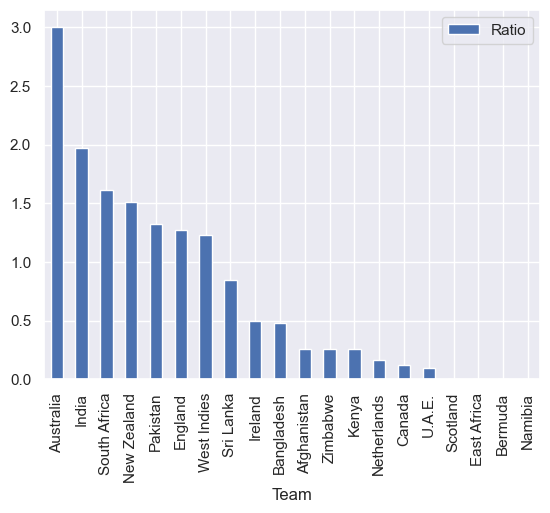

In [118]:
df = w_l[["Team","Ratio"]].sort_values(by="Ratio",ascending=False)
df.plot(kind="bar",x="Team",y = "Ratio")

> - **Australia** has the highest winning rate.
> - Followed by **India** and **South Africa**